# Basic Usage

<h2>Loading Relevant Libraries</h2>

In [1]:
from FLD_methods import *

<h2>Load Example Spectral Data From SCOPE</h2>

In [2]:
e_spectra = get_simulated_spectral_df('Esun_example.csv')
l_spectra = get_simulated_spectral_df('Lo_spectrum_inclF_example.csv')

The 'get_simulated_spectral_df' function extracts the hyperspectral data from a csv file and places it in a pandas dataframe with columns named from 400 to 2562.

In [3]:
e_spectra.head() # show the top of the pandas dataframe containing the E_spectra

,400,401,402,403,404,405,406,407,408,409,...,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561
0,336.01160,315.72190,342.59300,321.27470,350.8413,313.92670,310.36930,322.30000,331.49800,366.95710,...,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07
1,16.33707,15.35058,16.65706,15.62056,17.0581,15.26329,15.09033,15.67041,16.11762,17.84166,...,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07
2,164.84230,154.88850,168.07100,157.61260,172.1175,154.00780,152.26260,158.11560,162.62800,180.02370,...,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07
3,460.00450,432.22780,469.01460,439.82960,480.3066,429.77010,424.89990,441.23320,453.82550,502.36950,...,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07
4,230.18830,216.28870,234.69700,220.09270,240.3476,215.05880,212.62180,220.79500,227.09630,251.38790,...,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07


<h2>Apply the FLD Methods to the First Row of the Spectras to Extract the Fluorescence</h2>

In [4]:
# get the first rows of the spectra dataframes
# the methods take the spectras a np arrays so convert the object to this type

e_first_row = np.asarray(e_spectra.iloc[0])
l_first_row = np.asarray(l_spectra.iloc[0])
wavelengths = np.arange(400, 2562) # define the wavelengths at which the spectras were sampled

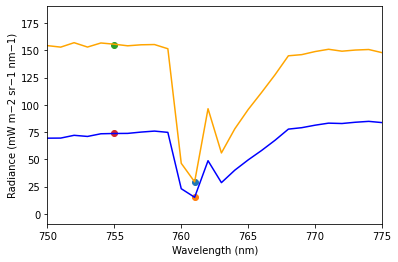

1.5600142462544888

In [5]:
# apply the sFLD method and show the plot

sFLD(e_first_row / np.pi, l_first_row, wavelengths, fwhm = 1, plot = True)

The plot shows the E spectra (Orange) and L spectra (Blue) at the O2A absorption band. The plotted points show the sFLD selection for the spectra values inside and outside of the absorption feature. The value shown is the fluorescence retrieved at the O2A absorption band.

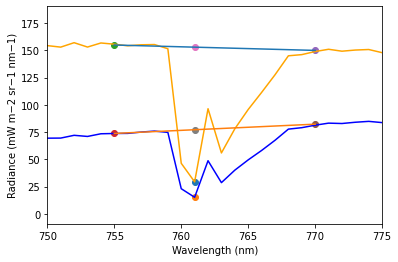

0.5314453924264796

In [6]:
# apply the 3FLD method and show the plot
three_FLD(e_first_row / np.pi, l_first_row, wavelengths, fwhm =1, plot = True)

The plot shows the E spectra (Orange) and L spectra (Blue) at the O2A absorption band. The plotted points show the 3FLD selection for the spectra values inside and on the shoulders of the absorption feature. The straight line plotted shows the interpolation between the two shoulders of the absorption feature and the interpolated point plotted shows the spectra value selected "outside" of the absorption feature. The value shown is the fluorescence retrieved at the O2A absorption band.

<h2>Resample the Data at Different FWHM for Sensor Simulation</h2>

In [7]:
# generate the spectras and wavelengths resampled at 3.5 nm
e_resampled, resampled_wavelengths = resample_spectra(fwhm = 3.5, spectra = e_first_row)
l_resampled = resample_spectra(fwhm=3.5, spectra= l_first_row)[0]

The 'resample_wavelengths' functions recieves the target fwhm and the desired spectra as inputs. A Gaussian convolution is then applied to the spectra and the function returns the spectra at the desired fwhm as well as the new sampling wavelengths for the spectra.

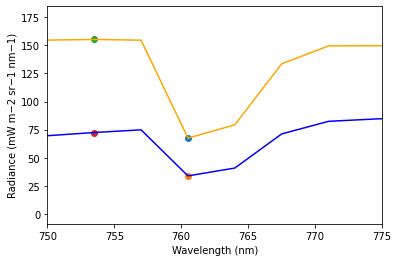

4.149036616843598

In [11]:
# now apply the FLD methods to the resampled data

sFLD(e_resampled / np.pi, l_resampled, resampled_wavelengths, fwhm = 3.5, plot = True)

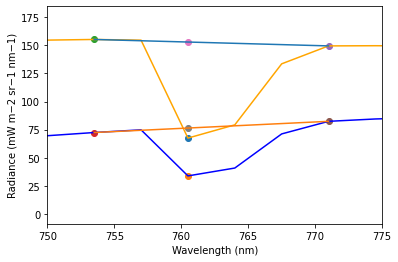

0.20516936096442012

In [12]:
three_FLD(e_resampled / np.pi, l_resampled, resampled_wavelengths, fwhm = 3.5, plot = True)